In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data Importing 
df = pd.read_csv("data/car_price.csv")

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
#finding null values
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [5]:
#No null values
#Understanding each features
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
#Converting Each object to its type which it should be

# Levy --> int
# Engine volume --> float
# Mileage --> float
# Wheel --> int

In [7]:
#Levy

df["Levy"] = df["Levy"].replace("-", 0)
df["Levy"] = df["Levy"].astype(int)

In [8]:
#Engine volume

df["Engine volume"].unique()


array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [9]:

#It is having Turbo Engine type, we can create seperate Column to see Engine is turbo or not

df["Turbo engine"] = df["Engine volume"].str.contains("Turbo")
df["Turbo engine"] = df["Turbo engine"].replace({True:"Yes", False:"No"})

In [10]:
df["Engine volume"] = df["Engine volume"].str.replace("Turbo", "").astype(float)

In [11]:
df["Engine volume"].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [12]:
df["Turbo engine"].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
#Mileage

df["Mileage"] = df["Mileage"].str.replace("km", "").astype(float)

In [14]:
#Doors
df["Doors"].value_counts()

Doors
04-May    18332
02-Mar      777
>5          128
Name: count, dtype: int64

In [15]:
df["Doors"]= df["Doors"].str.replace("-May", "").str.replace("-Mar", "").replace(">5", 5)

In [16]:
df["Doors"] = df["Doors"].astype(float)

In [17]:
df["Doors"].value_counts()

Doors
4.0    18332
2.0      777
5.0      128
Name: count, dtype: int64

In [18]:
#id ---> is the unique column which can be drop as it has no purpose in prediction

df = df.drop("ID", axis = 1)

In [19]:
#check for duplicate

df.duplicated().sum()

3512

In [20]:
#Removing the duplicates
df = df.drop_duplicates()

In [21]:
#Now checking the shape

df.shape

(15725, 18)

In [22]:
#segregating numerical & categorical columns

num_cols = df.columns[df.dtypes != "object"]
cat_cols = df.columns[df.dtypes == "object"]

In [23]:
num_cols

Index(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Doors', 'Airbags'],
      dtype='object')

In [24]:
cat_cols

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo engine'],
      dtype='object')

In [25]:
#Now segregating for categorcial cols

df[cat_cols].describe()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Turbo engine
count,15725,15725,15725,15725,15725,15725,15725,15725,15725,15725
unique,65,1590,11,2,7,4,3,2,16,2
top,HYUNDAI,Prius,Sedan,Yes,Petrol,Automatic,Front,Left wheel,Black,No
freq,3050,946,7010,10558,8824,10088,10990,14293,3835,13836


In [26]:
#Manufacturer

df["Manufacturer"].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [27]:
#Model

df["Model"].unique()

#There are about 1590 different unqiue Model are there
# in further we are going to perform one-hot encoding, so it will best to select the data which is having high frequency

array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
       'Prius C aqua'], dtype=object)

In [28]:
df["Model"].value_counts()

Model
Prius                     946
Sonata                    821
Elantra                   720
Camry                     581
Santa FE                  486
                         ... 
1500,1600 Schtufenheck      1
E 420                       1
C 250 luxury                1
Passat sport                1
Prius C aqua                1
Name: count, Length: 1590, dtype: int64

In [29]:
#Value we can select are how many have frequency more then 100 so that it can help in actual_prediction

model_count = df["Model"].value_counts()
model_filter = model_count[model_count >100]

In [30]:
model_filter

Model
Prius       946
Sonata      821
Elantra     720
Camry       581
Santa FE    486
FIT         422
Tucson      406
Aqua        317
Cruze       292
H1          284
X5          244
Optima      226
Fusion      220
Transit     207
Actyon      188
Jetta       186
Civic       167
RAV 4       159
REXTON      151
E 350       150
Astra       149
Captiva     135
Prius C     117
Passat      111
ML 350      106
Forester    101
Name: count, dtype: int64

In [31]:
# We will select the rows which contains above filter_categories

value_counts = df['Model'].value_counts()


selected_values = value_counts[value_counts > 100].index


df = df[df['Model'].isin(selected_values)]

In [32]:
df.shape

(7892, 18)

In [33]:
df["Manufacturer"].value_counts()

Manufacturer
HYUNDAI          2717
TOYOTA           2120
HONDA             589
FORD              427
CHEVROLET         427
SSANGYONG         339
VOLKSWAGEN        297
MERCEDES-BENZ     256
BMW               244
KIA               226
OPEL              149
SUBARU            101
Name: count, dtype: int64

In [34]:
#segregating numerical & categorical columns

num_cols = df.columns[df.dtypes != "object"]
cat_cols = df.columns[df.dtypes == "object"]

In [35]:
df[cat_cols].describe()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Turbo engine
count,7892,7892,7892,7892,7892,7892,7892,7892,7892,7892
unique,12,26,10,2,6,4,3,2,16,2
top,HYUNDAI,Prius,Sedan,Yes,Petrol,Automatic,Front,Left wheel,White,No
freq,2717,946,3887,5649,3482,5800,6908,7386,1993,7336


In [36]:
#Category

df["Category"].value_counts()

Category
Sedan          3887
Jeep           1947
Hatchback      1388
Minivan         186
Universal       176
Microbus        173
Goods wagon      77
Coupe            54
Pickup            2
Cabriolet         2
Name: count, dtype: int64

In [37]:
df["Fuel type"].value_counts()

Fuel type
Petrol            3482
Diesel            2085
Hybrid            1732
LPG                494
CNG                 79
Plug-in Hybrid      20
Name: count, dtype: int64

In [38]:
df["Gear box type"].value_counts()

Gear box type
Automatic    5800
Tiptronic    1149
Variator      479
Manual        464
Name: count, dtype: int64

In [39]:
df["Leather interior"].value_counts()

Leather interior
Yes    5649
No     2243
Name: count, dtype: int64

In [40]:
df["Drive wheels"].value_counts()

Drive wheels
Front    6908
4x4       695
Rear      289
Name: count, dtype: int64

In [41]:
df["Color"].value_counts()

Color
White            1993
Silver           1684
Black            1680
Grey             1049
Blue              593
Red               255
Orange            170
Brown              90
Green              81
Carnelian red      79
Golden             64
Yellow             57
Sky blue           52
Beige              33
Purple              8
Pink                4
Name: count, dtype: int64

In [42]:
df["Turbo engine"].value_counts()

Turbo engine
No     7336
Yes     556
Name: count, dtype: int64

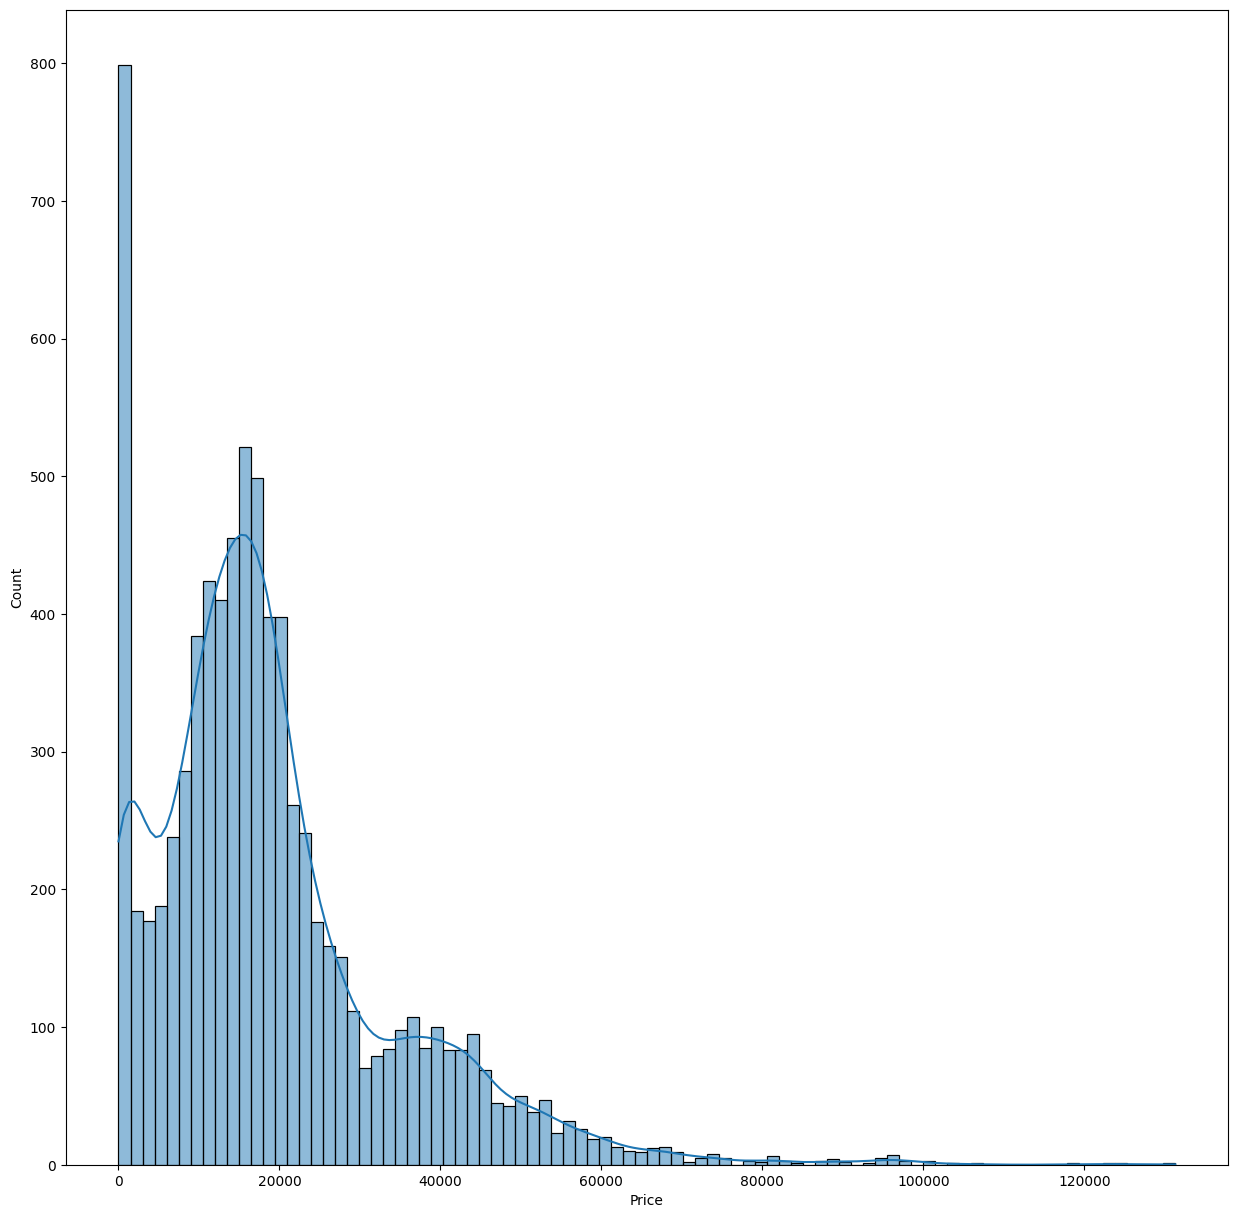

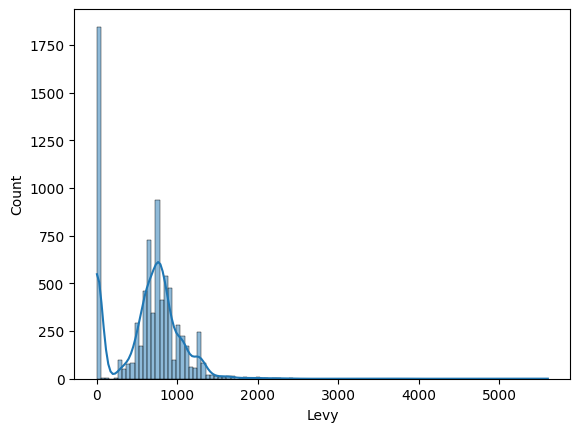

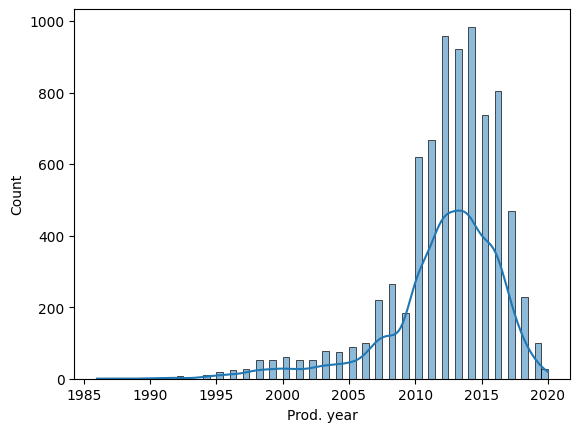

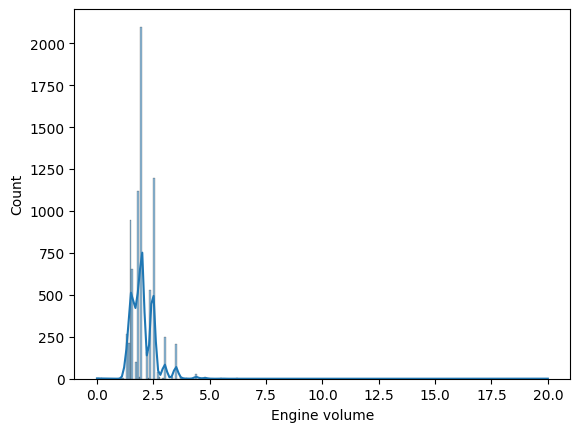

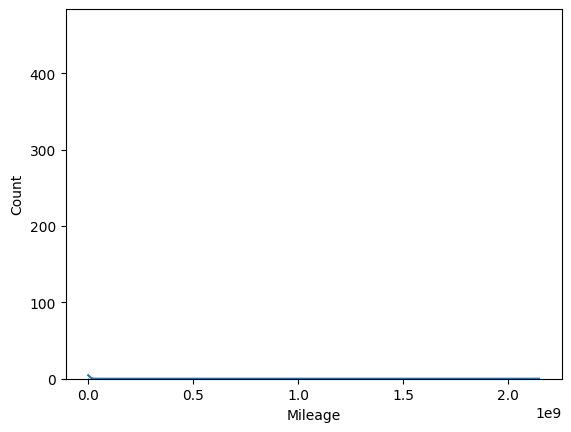

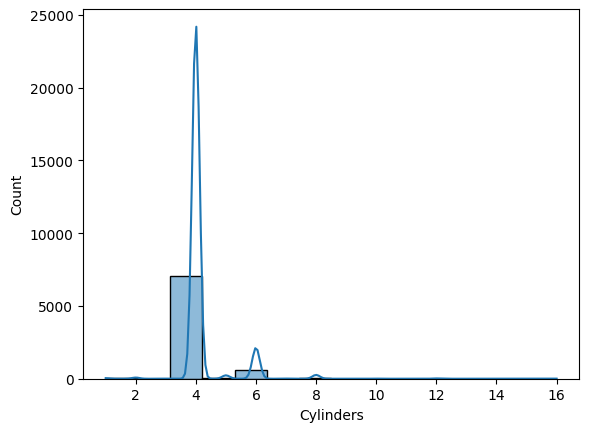

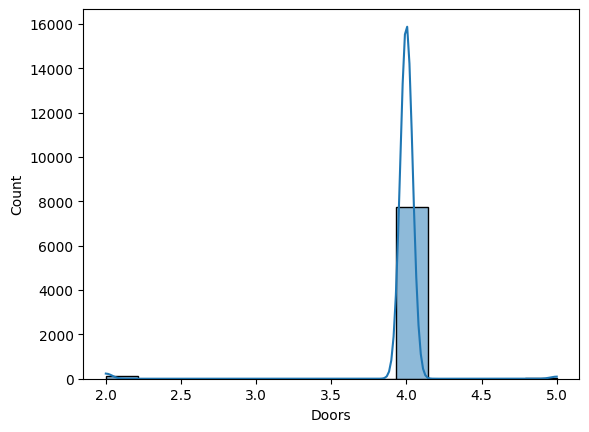

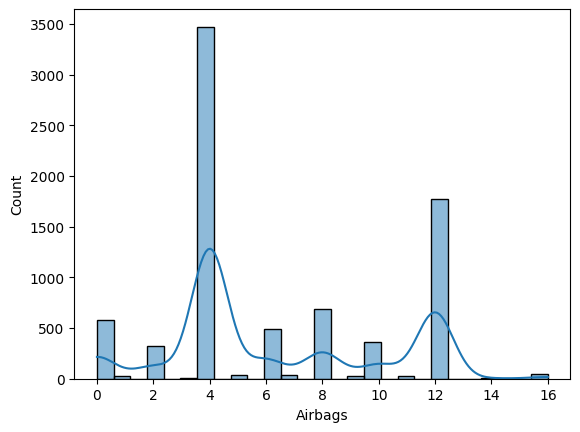

In [43]:
#for num_cols

plt.figure(figsize=(15, 15))
x = 1
for i in num_cols:
    sns.histplot(data = df, x = i, kde = True)
    print('\n')
    plt.show()


<Axes: >

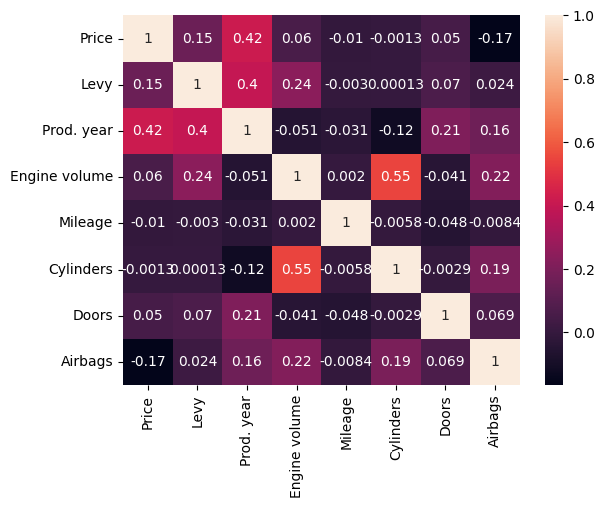

In [44]:
##corelation
sns.heatmap(df[num_cols].corr(), annot=True)

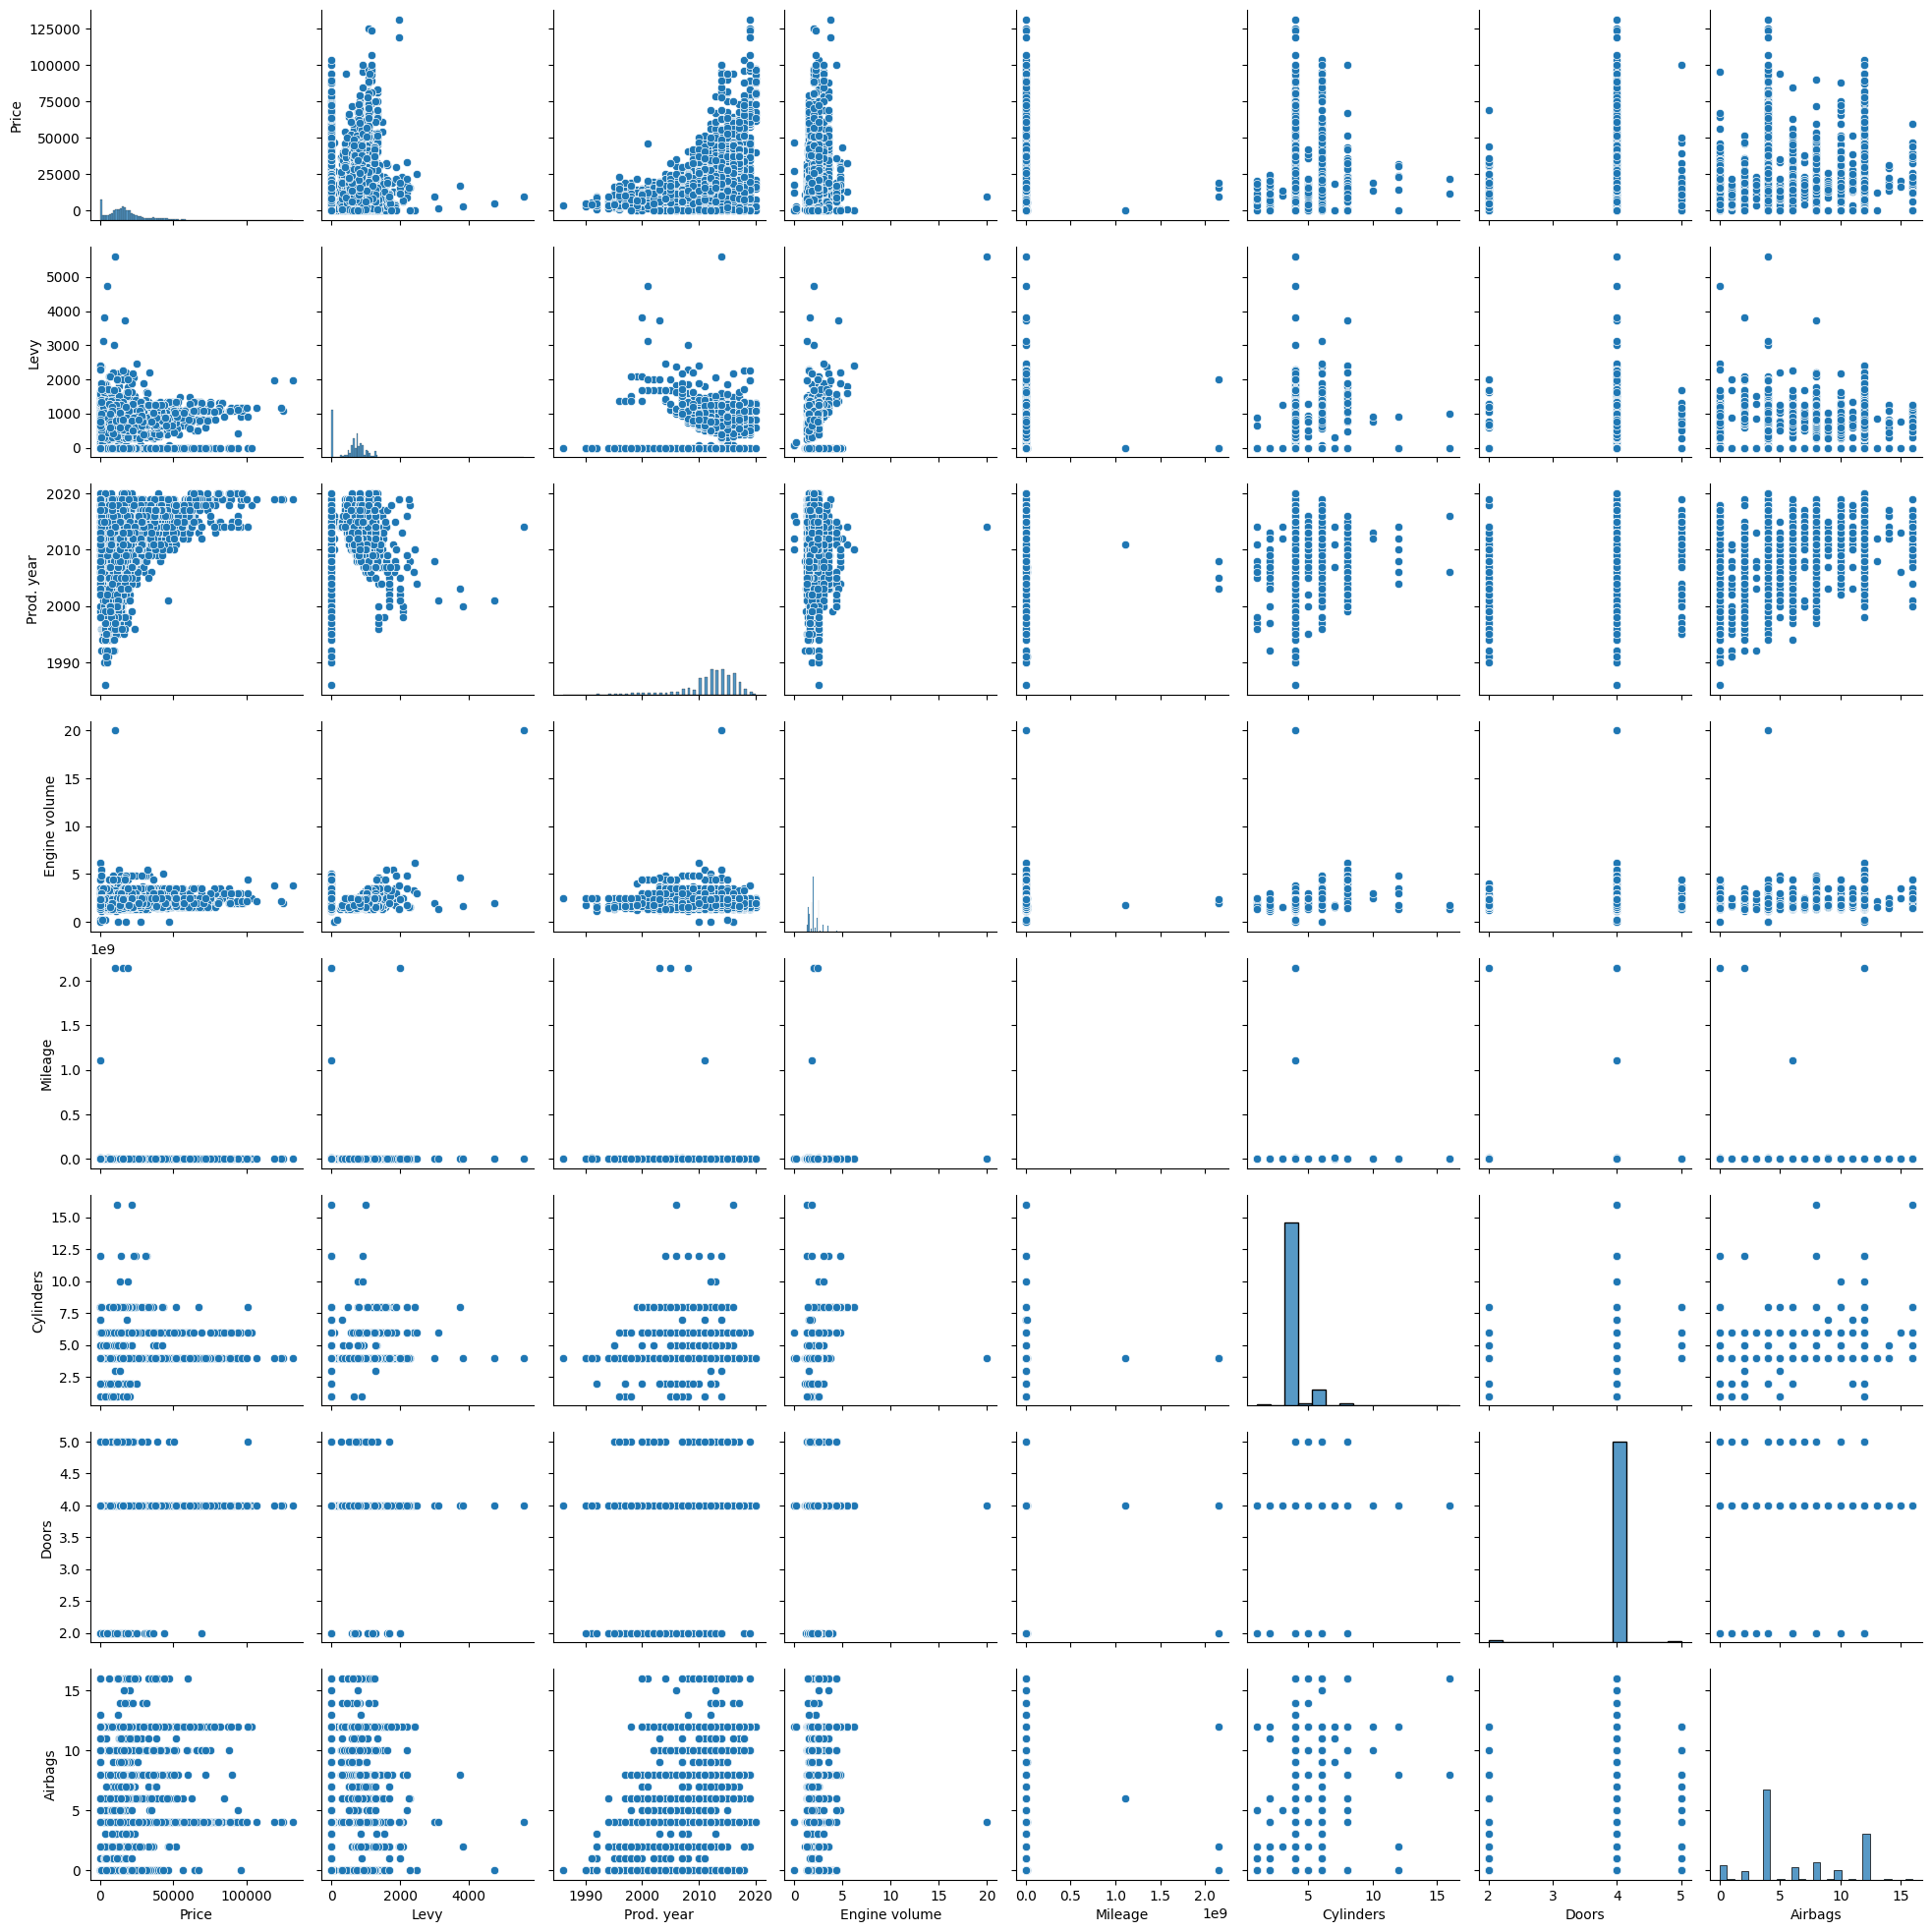

In [45]:
sns.pairplot(df[num_cols])

In [46]:
#Mileage feature is having very less significance as it is having many 0 values also.

df = df.drop("Mileage",axis=1)

In [47]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo engine
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,4.0,Variator,Front,4.0,Right-hand drive,Black,2,No
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,4.0,Automatic,Front,4.0,Left wheel,Silver,4,No
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,4.0,Automatic,Front,4.0,Left wheel,White,4,No
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,4.0,Automatic,Front,4.0,Left wheel,White,12,No
7,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,4.0,Automatic,Front,4.0,Left wheel,Grey,12,No


In [48]:
#To fit the categorical variable different encoding can be used.

#Manufacturer --> One-hot-encoding
#Model --> One-hot-encoding
#Category --> One-hot-encoding
#Color --> One-hot-encoding
#Leather Interior --> Binary encoding
#Fuel Type --> Categorical encoding 
#Gear box type --> Label encoding
#Drive wheels --> Label encoding
#Wheel --> Binary encoding
#Turbo engine --> Binary encoding
#Fuel Type ---> Label encoding

In [49]:
df[cat_cols].describe()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Turbo engine
count,7892,7892,7892,7892,7892,7892,7892,7892,7892,7892
unique,12,26,10,2,6,4,3,2,16,2
top,HYUNDAI,Prius,Sedan,Yes,Petrol,Automatic,Front,Left wheel,White,No
freq,2717,946,3887,5649,3482,5800,6908,7386,1993,7336


In [50]:
#Binary Encoding

#1 --> Leather Interior
#2 --> Wheel
#3 --> Turbo engine

Leather_interior = {"Yes" : 1, "No" :0}
Wheel = {"Left wheel":1, "Right wheel" : 0}
Turbo = {"Yes":1, "No" :0}

In [51]:
df["Leather interior"] = df["Leather interior"].map(Leather_interior)
df["Wheel"] = df["Wheel"].map(Wheel)
df["Turbo engine"] = df["Turbo engine"].map(Turbo)

In [52]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo engine
2,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,4.0,Variator,Front,4.0,NaN,Black,2,0
4,11726,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,4.0,Automatic,Front,4.0,1.0,Silver,4,0
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,1,Diesel,2.0,4.0,Automatic,Front,4.0,1.0,White,4,0
6,1803,761,TOYOTA,Prius,2010,Hatchback,1,Hybrid,1.8,4.0,Automatic,Front,4.0,1.0,White,12,0
7,549,751,HYUNDAI,Sonata,2013,Sedan,1,Petrol,2.4,4.0,Automatic,Front,4.0,1.0,Grey,12,0


In [53]:
#Label Encoding

#1 --> Gear Box Type
#2 --> Drive Wheels

In [54]:
df["Gear box type"].unique()
df["Drive wheels"].unique()
df["Fuel type"].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'CNG', 'Plug-in Hybrid', 'LPG'],
      dtype=object)

In [55]:
gear_type = {"Manual":1, "Automatic":2, "Tiptronic":3, "Variator":4}
drive_wheels = {"Rear":1, "Front":2, "4x4":3}
fuel_type = {"LPG":1, "CNG":2, "Diesel" :3, "Petrol" :4, "Hybrid":5, "Plug-in Hybrid":6}

In [56]:
df["Gear box type"] = df["Gear box type"].map(gear_type)
df["Drive wheels"] = df["Drive wheels"].map(drive_wheels)
df["Fuel type"] = df["Fuel type"].map(fuel_type)

In [57]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo engine
2,8467,0,HONDA,FIT,2006,Hatchback,0,4,1.3,4.0,4,2,4.0,NaN,Black,2,0
4,11726,446,HONDA,FIT,2014,Hatchback,1,4,1.3,4.0,2,2,4.0,1.0,Silver,4,0
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,1,3,2.0,4.0,2,2,4.0,1.0,White,4,0
6,1803,761,TOYOTA,Prius,2010,Hatchback,1,5,1.8,4.0,2,2,4.0,1.0,White,12,0
7,549,751,HYUNDAI,Sonata,2013,Sedan,1,4,2.4,4.0,2,2,4.0,1.0,Grey,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,50,0,TOYOTA,Prius,2008,Hatchback,0,5,1.5,4.0,2,2,4.0,1.0,Silver,6,0
19230,470,645,TOYOTA,Prius,2011,Hatchback,1,5,1.8,4.0,2,2,4.0,1.0,Silver,12,0
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,1,4,2.4,4.0,3,2,4.0,1.0,Red,8,0
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,1,3,2.0,4.0,2,2,4.0,1.0,Grey,4,0


In [58]:
#One-hot encoding for columns

#Manufacturer 
#Model 
#Category 
#Color 

In [59]:
#Manufacturer
encode_1 = pd.get_dummies(df["Manufacturer"], prefix = "Manufacturer")
df = pd.concat([df, encode_1], axis = 1)
df = df.drop("Manufacturer", axis = 1)


In [60]:
#Model
encode_2 = pd.get_dummies(df["Model"], prefix = "Model")
df = pd.concat([df, encode_2], axis = 1)
df = df.drop("Model", axis = 1)

In [61]:
#Category
encode_3= pd.get_dummies(df["Category"], prefix = "Category")
df = pd.concat([df, encode_3], axis = 1)
df = df.drop("Category", axis = 1)

In [62]:
#Color
encode_4 = pd.get_dummies(df["Color"], prefix = "Color")
df = pd.concat([df, encode_4], axis = 1)
df = df.drop("Color", axis = 1)

In [63]:
df.head()

,Price,Levy,Prod. year,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
2,8467,0,2006,0,4,1.3,4.0,4,2,4.0,...,False,False,False,False,False,False,False,False,False,False
4,11726,446,2014,1,4,1.3,4.0,2,2,4.0,...,False,False,False,False,False,False,True,False,False,False
5,39493,891,2016,1,3,2.0,4.0,2,2,4.0,...,False,False,False,False,False,False,False,False,True,False
6,1803,761,2010,1,5,1.8,4.0,2,2,4.0,...,False,False,False,False,False,False,False,False,True,False
7,549,751,2013,1,4,2.4,4.0,2,2,4.0,...,False,True,False,False,False,False,False,False,False,False


In [64]:
df = df.replace({True:1, False:0})

In [65]:
df

,Price,Levy,Prod. year,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
2,8467,0,2006,0,4,1.3,4.0,4,2,4.0,...,0,0,0,0,0,0,0,0,0,0
4,11726,446,2014,1,4,1.3,4.0,2,2,4.0,...,0,0,0,0,0,0,1,0,0,0
5,39493,891,2016,1,3,2.0,4.0,2,2,4.0,...,0,0,0,0,0,0,0,0,1,0
6,1803,761,2010,1,5,1.8,4.0,2,2,4.0,...,0,0,0,0,0,0,0,0,1,0
7,549,751,2013,1,4,2.4,4.0,2,2,4.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,50,0,2008,0,5,1.5,4.0,2,2,4.0,...,0,0,0,0,0,0,1,0,0,0
19230,470,645,2011,1,5,1.8,4.0,2,2,4.0,...,0,0,0,0,0,0,1,0,0,0
19233,15681,831,2011,1,4,2.4,4.0,3,2,4.0,...,0,0,0,0,0,1,0,0,0,0
19234,26108,836,2010,1,3,2.0,4.0,2,2,4.0,...,0,1,0,0,0,0,0,0,0,0


In [66]:
df.shape

(7892, 77)